In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [77]:
# area
x1 = np.array([[73.5,75.,76.5,79.,81.5,82.5,84.,85.,86.5,87.5,89.,90.,91.5]]).T
# distance to center
x2 = np.array([[20, 18, 17, 16, 15, 14, 12, 10, 8, 7, 5, 2, 1]]).T
# input matrix X
X = np.concatenate([x1,x2], axis=1)

# price
y = np.array([[1.49,1.50,1.51,1.54,1.58,1.59,1.60,1.62,1.63,1.64,1.66,1.67,1.68]]).T

In [78]:
# Visualize data
def _plot_act_pred(x, y_act, y_pred, title="", xlabel="", ylabel=""):
  plt.figure(figsize=(14, 8))
  plt.plot(x, y_act, 'r-o', label="price actual")
  plt.plot(x, y_pred, '--', label="price predict")
  x_min = np.min(x)
  x_max = np.max(x)
  y_min = np.min(y)
  y_max = np.max(y)
  # mean price
  ybar = np.mean(y)
  plt.axhline(ybar, linestyle='--', linewidth=4, label="mean")
  plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])
  plt.xlabel(xlabel, fontsize=16)
  plt.ylabel(ylabel, fontsize=16)
  plt.text(x_min, ybar*1.01, "mean", fontsize=16)
  plt.legend(fontsize=15)
  plt.title(title, fontsize=20)
  plt.show()

In [79]:
X

array([[73.5, 20. ],
       [75. , 18. ],
       [76.5, 17. ],
       [79. , 16. ],
       [81.5, 15. ],
       [82.5, 14. ],
       [84. , 12. ],
       [85. , 10. ],
       [86.5,  8. ],
       [87.5,  7. ],
       [89. ,  5. ],
       [90. ,  2. ],
       [91.5,  1. ]])

In [80]:
from sklearn import linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias

regr.fit(X, y)

# Compare two results
print( 'Coefficient : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ )

Coefficient :  [[0.01252422 0.00130004]]
Interception  :  [0.53665806]


In [81]:
y_pred = regr.predict(X)

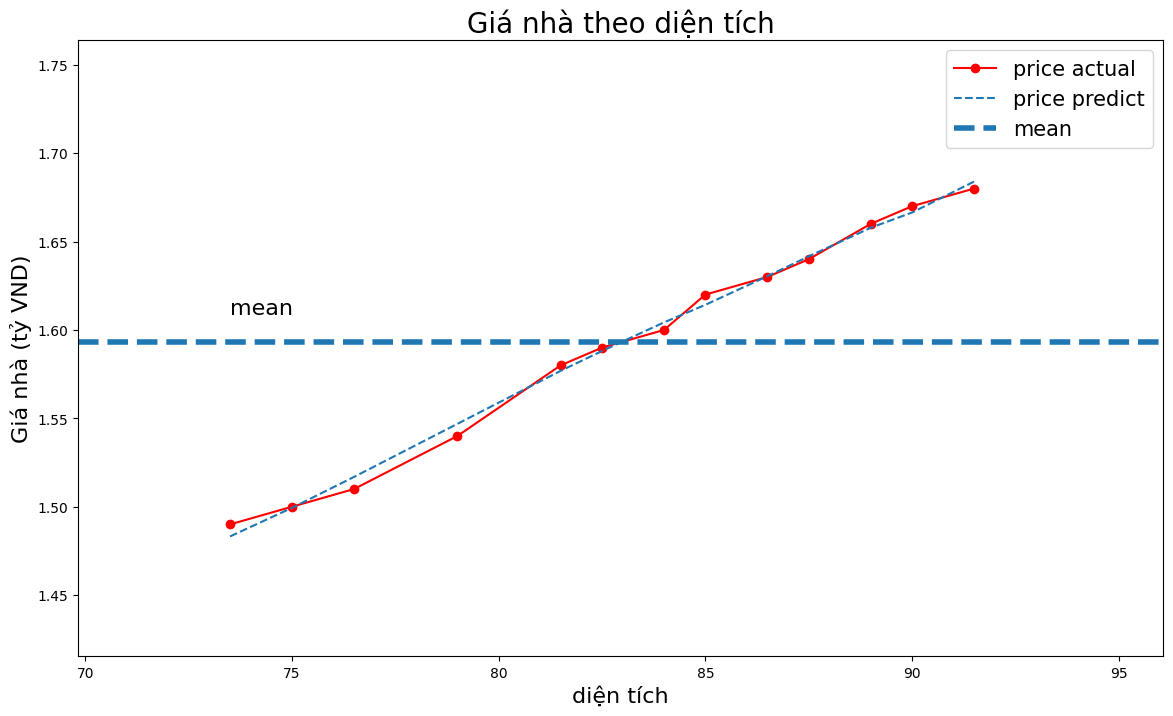

In [82]:
_plot_act_pred(x1, y, y_pred, 
      title='Giá nhà theo diện tích',  
      xlabel='diện tích', 
      ylabel='Giá nhà (tỷ VND)')

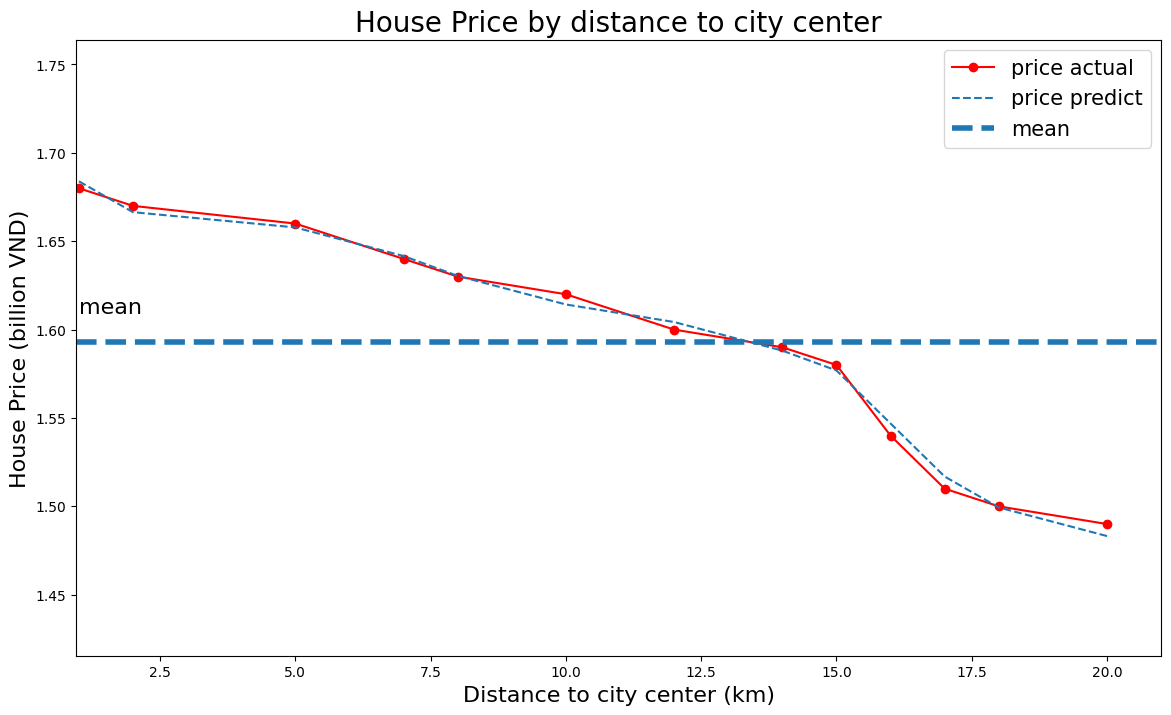

In [83]:

_plot_act_pred(x2, y, y_pred,
      title='House Price by distance to city center',  
      xlabel='Distance to city center (km)', 
      ylabel='House Price (billion VND)')

In [84]:
x1 = np.arange(90, 111, 1)
x1 = np.expand_dims(x1, axis=1)
# Khởi tạo khoảng cách tới trung tâm
x2 = np.arange(10, 31, 1)
x2 = np.expand_dims(x2, axis=1)
# Ma trận đầu vào
X = np.concatenate([x1, x2], axis = 1)

# Dự báo 
ypred3D = regr.predict(X)

In [85]:
# Tạo lưới ma trận
x1grid, x2grid = np.meshgrid(x1, x2)


In [86]:
ys = []
for i in range(len(x1)):
  x1i=x1grid[:, i:(i+1)]
  x2i=x2grid[:, i:(i+1)]
  X = np.concatenate([x1i, x2i], axis=1)
  yi = regr.predict(X)
  ys.append(yi)

ypred3D = np.concatenate(ys, axis=1)

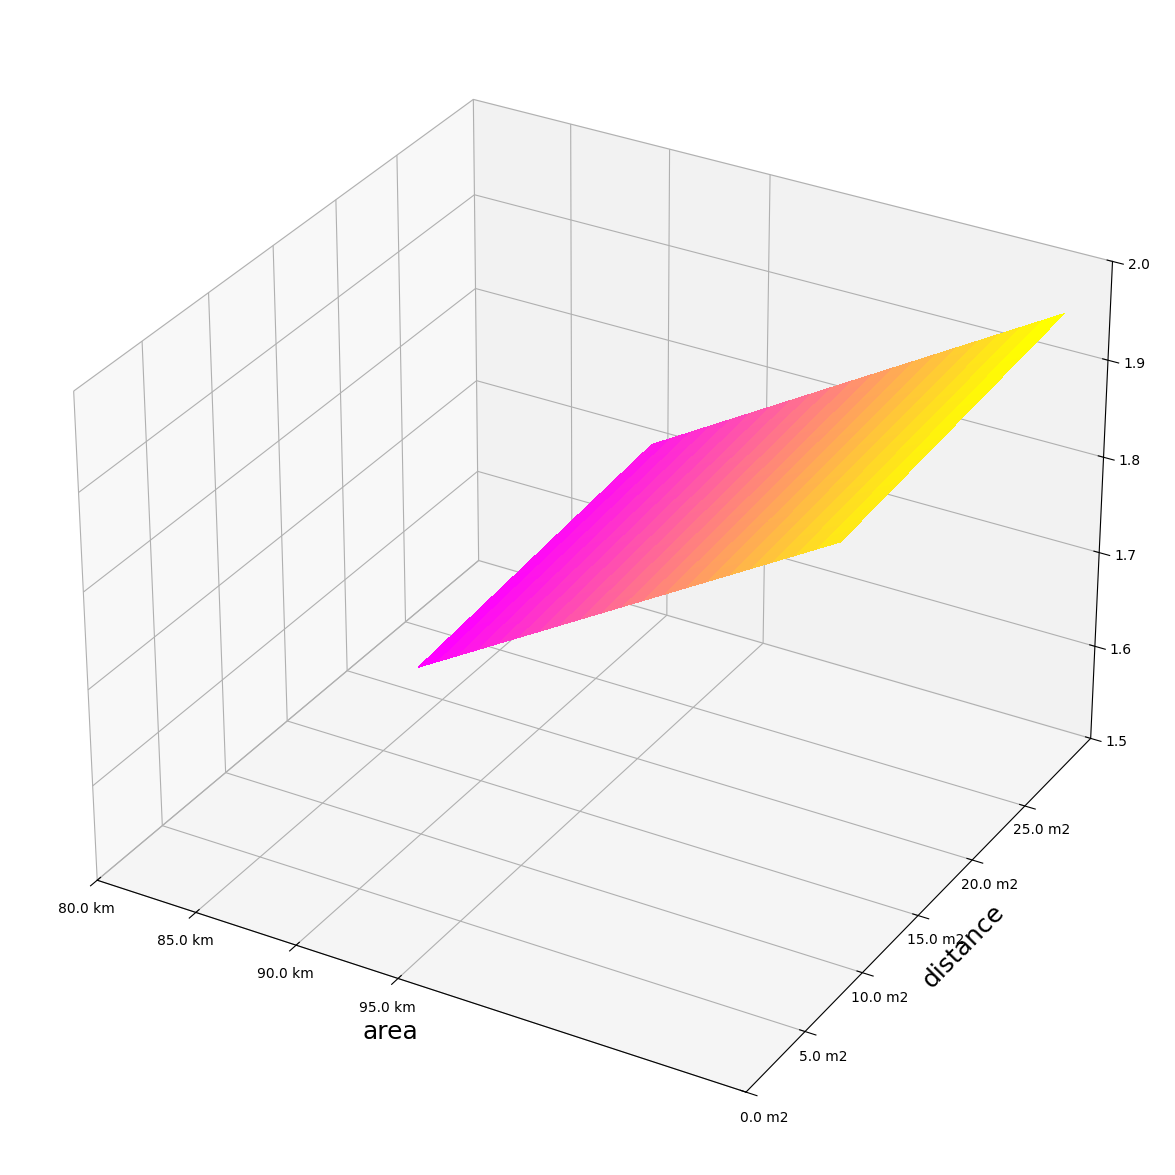

In [87]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))

# Plot the surface.
surf = ax.plot_surface(x1grid, x2grid, ypred3D,cmap=cm.spring,
                       linewidth=0, antialiased=False)


x_pos = np.arange(80.0,100.0, 5)
x_names = [str(x_tick)+ " km" for x_tick in x_pos]
plt.xticks(x_pos, x_names)

y_pos = np.arange(0.0,30.0, 5)
y_names = [str(y_tick)+ " m2" for y_tick in y_pos]
plt.yticks(y_pos, y_names)

ax.set_zlim(1.5, 2.0)
plt.xlabel('area', fontsize=18)
plt.ylabel('distance', fontsize=18)

plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error


print(f"r2_score: {r2_score(y, y_pred)}") # 
print(f"mean_absolute_error: {mean_absolute_error(y, y_pred)}") # norm 1 (does not capture differences in units in varables)
print(f"mean_absolute_percentage_error: {mean_absolute_percentage_error(y, y_pred)}") 
# The model has an average error of 0.2% relative to the mean value   

r2_score: 0.9953000498319885
mean_absolute_error: 0.0036891956030299803
mean_absolute_percentage_error: 0.0023412692393164746
